In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('od.csv')

In [3]:
df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
0,"""V"" MATERIAL IN CLICKBOND CB4023V, GLASS/PEI -...",GSC33214,CLB,0.37,12,0.00,1.0,0.35,CLICKBOND,NaN
1,"""VC"" MATERIAL IN CLICKBOND CB9257VC, CARBON FI...",GSC33217,CLB,0.52,12,0.00,1.0,0.28,CLICKBOND,NaN
2,"0.5 MIL KAPTON KEVLAR, SHELDAHL 177544",GSC32950,SCH,2.48,6,0.05,1.0,1.97,BLANKET MATERIAL,NaN
3,0667 BLACK EPDM,GSC34174,PRS,0.65,15,0.13,1.0,0.07,ORING,NaN
4,1 INCH COPPER TAPE,GSC33829,MMM,0.24,16,0.08,1.0,0.01,TAPE,NaN


In [4]:
r,c = df.shape
r

12859

In [5]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/r)*100})
missing_data

,perc_missing,total_missing
Sample Material,0.000000,0
ID,0.000000,0
MFR,0.000000,0
TML,0.007777,1
Category,0.000000,0
CVCM,0.046660,6
Space Code,0.015553,2
WVR,21.867952,2812
Material Usage,0.015553,2
Cure,45.648962,5870


In [6]:
df = df.dropna()
r,c = df.shape
r

5276

In [7]:
df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,10SL7AP APPLE RUBBER 70 DURIMETER PHENYL SILIC...,GSC34036,APR,0.26,15,0.07,1.0,0.05,O-RING,4H
8,10SL7AP APPLE RUBBER 70 DURIMETER PHENYL SILIC...,GSC34039,APR,0.09,15,0.01,2.0,0.05,O-RING,4H
12,13664 FLUOROCARBON RUBBER (F75),GSC33088,PCX,0.13,15,0.00,2.0,0.06,RUBBER,10M
17,27% NI-CLAD COPPER WIRE WITH H-ALCAL INSULATION,GSC29605,CFW,0.03,99,0.01,1.0,0.02,WIRE,3H
20,3 HOUR EPOXY A/B 1/1 PWB,GSC27526,UNK,14.13,0,0.04,1.0,0.37,ADHESIVE,14D


In [8]:
le = LabelEncoder()
df['Sample Material']= le.fit_transform(df['Sample Material'].astype('str'))
df.head()


,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,0,GSC34036,APR,0.26,15,0.07,1.0,0.05,O-RING,4H
8,0,GSC34039,APR,0.09,15,0.01,2.0,0.05,O-RING,4H
12,1,GSC33088,PCX,0.13,15,0.00,2.0,0.06,RUBBER,10M
17,2,GSC29605,CFW,0.03,99,0.01,1.0,0.02,WIRE,3H
20,3,GSC27526,UNK,14.13,0,0.04,1.0,0.37,ADHESIVE,14D


In [9]:
le = LabelEncoder()
df['MFR']= le.fit_transform(df['MFR'].astype('str'))
df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,0,GSC34036,44,0.26,15,0.07,1.0,0.05,O-RING,4H
8,0,GSC34039,44,0.09,15,0.01,2.0,0.05,O-RING,4H
12,1,GSC33088,439,0.13,15,0.00,2.0,0.06,RUBBER,10M
17,2,GSC29605,97,0.03,99,0.01,1.0,0.02,WIRE,3H
20,3,GSC27526,600,14.13,0,0.04,1.0,0.37,ADHESIVE,14D


In [10]:
le = LabelEncoder()
df['Cure']= le.fit_transform(df['Cure'].astype('str'))
df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,0,GSC34036,44,0.26,15,0.07,1.0,0.05,O-RING,122
8,0,GSC34039,44,0.09,15,0.01,2.0,0.05,O-RING,122
12,1,GSC33088,439,0.13,15,0.00,2.0,0.06,RUBBER,16
17,2,GSC29605,97,0.03,99,0.01,1.0,0.02,WIRE,102
20,3,GSC27526,600,14.13,0,0.04,1.0,0.37,ADHESIVE,34


In [11]:
le = LabelEncoder()
df['Material Usage']= le.fit_transform(df['Material Usage'].astype('str'))
df.head()

,Sample Material,ID,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,0,GSC34036,44,0.26,15,0.07,1.0,0.05,221,122
8,0,GSC34039,44,0.09,15,0.01,2.0,0.05,221,122
12,1,GSC33088,439,0.13,15,0.00,2.0,0.06,273,16
17,2,GSC29605,97,0.03,99,0.01,1.0,0.02,369,102
20,3,GSC27526,600,14.13,0,0.04,1.0,0.37,14,34


In [12]:
# rename colums
# df = df.rename(columns= {'Date/Time - Peak Brightness (UT)':'date', 
#                           'Latitude (Deg)':'lat', 
#                           'Longitude (Deg)':'long',
#                         'Altitude (km)': 'alt',
#                          'Velocity (km/s)': 'vel',
#                          'Velocity Components (km/s): vx': 'velx',
#                          'Velocity Components (km/s): vy': 'vely',
#                          'Velocity Components (km/s): vz': 'velz',
#                          'Total Radiated Energy (J)':'tot_j',
#                          'Calculated Total Impact Energy (kt)': 'tot_kt' 
#                         })

r, c = df.shape
print(r, c)

(5276, 10)


In [13]:
## missing data
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/r)*100})
missing_data

,perc_missing,total_missing
Sample Material,0.0,0
ID,0.0,0
MFR,0.0,0
TML,0.0,0
Category,0.0,0
CVCM,0.0,0
Space Code,0.0,0
WVR,0.0,0
Material Usage,0.0,0
Cure,0.0,0


In [14]:
df.describe()

,Sample Material,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
count,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000
mean,2074.328658,274.996588,1.948412,7.731994,0.296499,1.305724,0.331897,139.051365,95.217400
std,1209.761265,171.056513,4.006997,13.068895,1.606120,0.607671,1.469933,106.737631,45.181965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1031.000000,139.000000,0.400000,1.000000,0.010000,1.000000,0.060000,14.000000,53.000000
50%,2081.500000,255.000000,0.870000,3.000000,0.040000,1.000000,0.190000,130.000000,83.000000
75%,3122.250000,385.000000,1.790000,13.000000,0.130000,1.000000,0.390000,236.000000,139.000000
max,4190.000000,642.000000,99.750000,99.000000,62.200000,9.000000,99.990000,373.000000,182.000000


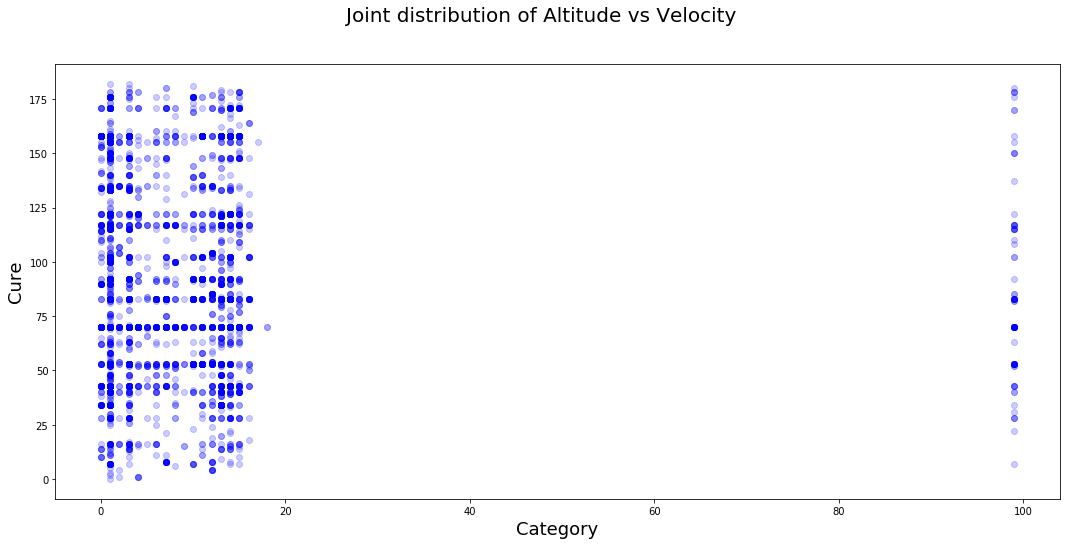

In [15]:
new_data = df
plt.figure(figsize=(18,8))
plt.xlabel("Category", fontsize=18)
plt.ylabel("Cure", fontsize=18)
plt.suptitle("Joint distribution of Altitude vs Velocity", fontsize= 20)
plt.plot(new_data['Category'], new_data['Cure'], 'bo', alpha=0.2)
plt.show()

In [16]:
new_data.columns

Index([u'Sample Material', u'ID', u'MFR', u'TML', u'Category', u'CVCM',
       u'Space Code', u'WVR', u'Material Usage', u'Cure'],
      dtype='object')

In [17]:
# def plot_dist(col, ax):
#     new_data[col][new_data[col].notnull()].value_counts().plot('bar', facecolor='y', ax=ax)
#     ax.set_xlabel('{}'.format(col), fontsize=20)
#     ax.set_title("{} --".format(col), fontsize= 18)
#     return ax

# f, ax = plt.subplots(3,3, figsize = (22,15))
# f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
# cols = new_data.columns.to_list()
# k = 0
# for i in range(2):
#     for j in range(2):
#         plot_dist(cols[k], ax[i][j])
#         k += 1
# __ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [18]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [19]:
to_drop = ['ID']

new_data = new_data.drop(to_drop, axis=1)
# df = df.replace(np.nan, 0)
new_data.head()


,Sample Material,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
7,0,44,0.26,15,0.07,1.0,0.05,221,122
8,0,44,0.09,15,0.01,2.0,0.05,221,122
12,1,439,0.13,15,0.00,2.0,0.06,273,16
17,2,97,0.03,99,0.01,1.0,0.02,369,102
20,3,600,14.13,0,0.04,1.0,0.37,14,34


In [68]:
# X = new_data.iloc[:, 1:].values
# Y = new_data.iloc[:, 0].values 

# prepare the data
features = new_data.drop(['Category'], axis = 1)
labels = pd.DataFrame(new_data['Category'])

X = features.values
Y = labels.values

In [69]:
new_data.tail()

,Sample Material,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage,Cure
12826,4187,25,5.82,13,0.00,1.0,1.73,238,34
12827,4183,642,0.68,1,0.28,1.0,0.10,14,178
12833,4188,307,2.48,13,0.00,1.0,1.28,234,14
12842,4184,254,0.97,1,0.56,1.0,0.03,16,53
12845,4189,165,1.03,1,0.06,1.0,0.28,55,158


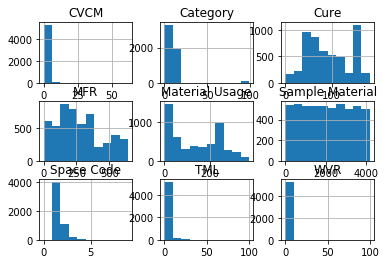

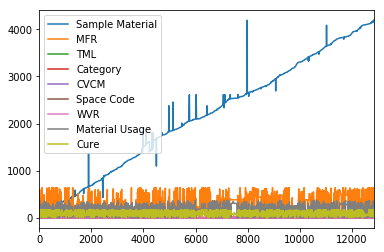

In [70]:
new_data.hist()
new_data.plot()

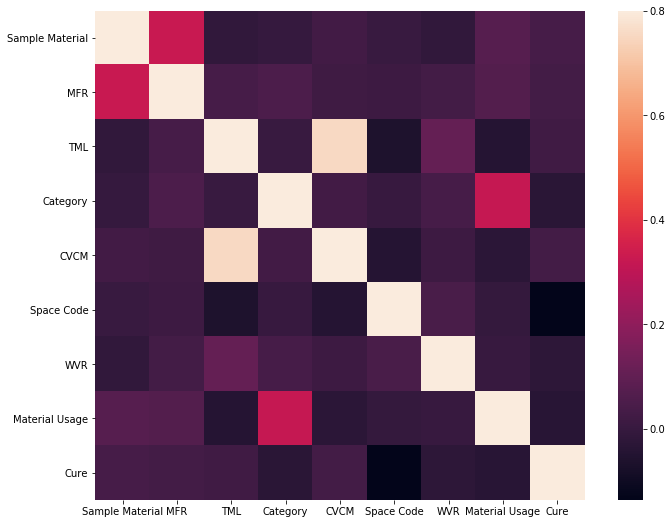

In [71]:
correlation_matrix = new_data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [72]:
# imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# X = imp.fit_transform(X)
# Y = Y.reshape(-1,1)
# Y = imp.fit_transform(Y)
# Y = Y.reshape(-1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [74]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train, y_train)
X_test = sc_X.transform(X_test, y_test)

/Users/Maen/.virtualenvs/tf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:765: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


In [75]:
X_train[:]

array([[-0.14071895, -0.07790877, -0.0783778 , ...,  0.12680721,
        -1.16287934,  1.40358058],
       [ 0.76429803,  0.53512481, -0.24990325, ..., -0.18578578,
        -1.17221992,  1.40358058],
       [ 1.04124312,  0.64021629,  5.12287937, ...,  1.35402412,
        -1.17221992, -0.10509883],
       ...,
       [ 0.95387354, -0.11877768, -0.4441306 , ..., -0.1973633 ,
         1.03215914,  1.40358058],
       [-0.26023395,  1.73783833,  2.08839228, ...,  0.05155334,
        -0.62112516,  0.84891903],
       [ 0.17578972,  0.44754859, -0.10864699, ..., -0.00633425,
        -1.17221992, -0.92599792]])

In [76]:
y_train[:]

array([[ 1],
       [ 1],
       [ 0],
       ...,
       [14],
       [ 3],
       [ 1]])

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
regr.score(X_test, y_test)

0.13386066427172127

In [79]:
alphas = np.logspace(-4, -1, 6)
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(X_train, y_train)
              .score(X_test, y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(X_train, y_train)
regr.score(X_test, y_test)
# print(regr.coef_)  

0.13386009874184635

In [80]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10)
                   

array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
        0.40597035,  0.23656049,  0.38709149, -2.06488186, -0.95162992])

In [81]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)

array([ 0.02987541, -1.29925781,  0.34096191, -0.20801358, -0.01676839,
       -0.46053696,  0.42647746, -0.21858822,  0.15138643,  0.28534552])

In [82]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X



poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [84]:
model = model.fit(X_train, y_train)

In [85]:
model.predict(X_test)

array([[34.01714206],
       [ 1.30515808],
       [-0.34382145],
       ...,
       [10.86801929],
       [ 9.8269998 ],
       [11.29867458]])

In [86]:
model.score(X_test, y_test)

-0.3319031893728721

In [87]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train) 


reg.coef_

reg.intercept_

array([7.85892229])

In [88]:
reg.score(X_test, y_test)

0.13385830696521162

In [89]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
clf.score(X_test, y_test, sample_weight=None)

0.490840176879343